In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor 

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('ola.csv') 
df.head()


,datetime,Season,Weather,Temperature,Humidity,WindSpeed,Casual,Registered,Count
0,12-12-2023 08:00,1,1,9.4,60,0.0,5,20,25
1,12-12-2023 12:00,1,1,9.7,55,0.0,8,15,23
2,12-12-2023 18:00,1,1,9.2,70,0.0,3,18,21
3,13-12-2023 09:30,1,1,9.8,80,0.0,6,22,28
4,13-12-2023 15:45,1,1,9.5,75,0.0,7,25,32


In [3]:
parts = df["datetime"].str.split(" ", n=2, expand=True) 
df["date"] = parts[0] 
df["time"] = parts[1].str[:2].astype('int') 
df.head() 


,datetime,Season,Weather,Temperature,Humidity,WindSpeed,Casual,Registered,Count,date,time
0,12-12-2023 08:00,1,1,9.4,60,0.0,5,20,25,12-12-2023,8
1,12-12-2023 12:00,1,1,9.7,55,0.0,8,15,23,12-12-2023,12
2,12-12-2023 18:00,1,1,9.2,70,0.0,3,18,21,12-12-2023,18
3,13-12-2023 09:30,1,1,9.8,80,0.0,6,22,28,13-12-2023,9
4,13-12-2023 15:45,1,1,9.5,75,0.0,7,25,32,13-12-2023,15


In [4]:
parts = df["date"].str.split("-", n=3, expand=True) 
df["day"] = parts[0].astype('int') 
df["month"] = parts[1].astype('int') 
df["year"] = parts[2].astype('int') 
df.head() 


,datetime,Season,Weather,Temperature,Humidity,WindSpeed,Casual,Registered,Count,date,time,day,month,year
0,12-12-2023 08:00,1,1,9.4,60,0.0,5,20,25,12-12-2023,8,12,12,2023
1,12-12-2023 12:00,1,1,9.7,55,0.0,8,15,23,12-12-2023,12,12,12,2023
2,12-12-2023 18:00,1,1,9.2,70,0.0,3,18,21,12-12-2023,18,12,12,2023
3,13-12-2023 09:30,1,1,9.8,80,0.0,6,22,28,13-12-2023,9,13,12,2023
4,13-12-2023 15:45,1,1,9.5,75,0.0,7,25,32,13-12-2023,15,13,12,2023


In [5]:
from datetime import datetime 
import calendar 


def weekend_or_weekday(year, month, day): 

	d = datetime(year, month, day) 
	if d.weekday() > 4: 
		return 0
	else: 
		return 1


df['weekday'] = df.apply(lambda x: 
						weekend_or_weekday(x['year'], 
											x['month'], 
											x['day']), 
						axis=1) 
df.head() 


,datetime,Season,Weather,Temperature,Humidity,WindSpeed,Casual,Registered,Count,date,time,day,month,year,weekday
0,12-12-2023 08:00,1,1,9.4,60,0.0,5,20,25,12-12-2023,8,12,12,2023,1
1,12-12-2023 12:00,1,1,9.7,55,0.0,8,15,23,12-12-2023,12,12,12,2023,1
2,12-12-2023 18:00,1,1,9.2,70,0.0,3,18,21,12-12-2023,18,12,12,2023,1
3,13-12-2023 09:30,1,1,9.8,80,0.0,6,22,28,13-12-2023,9,13,12,2023,1
4,13-12-2023 15:45,1,1,9.5,75,0.0,7,25,32,13-12-2023,15,13,12,2023,1


In [6]:
def am_or_pm(x): 
	if x > 11: 
		return 1
	else: 
		return 0


df['am_or_pm'] = df['time'].apply(am_or_pm) 
df.head() 


,datetime,Season,Weather,Temperature,Humidity,WindSpeed,Casual,Registered,Count,date,time,day,month,year,weekday,am_or_pm
0,12-12-2023 08:00,1,1,9.4,60,0.0,5,20,25,12-12-2023,8,12,12,2023,1,0
1,12-12-2023 12:00,1,1,9.7,55,0.0,8,15,23,12-12-2023,12,12,12,2023,1,1
2,12-12-2023 18:00,1,1,9.2,70,0.0,3,18,21,12-12-2023,18,12,12,2023,1,1
3,13-12-2023 09:30,1,1,9.8,80,0.0,6,22,28,13-12-2023,9,13,12,2023,1,0
4,13-12-2023 15:45,1,1,9.5,75,0.0,7,25,32,13-12-2023,15,13,12,2023,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     48 non-null     object 
 1   Season       48 non-null     int64  
 2   Weather      48 non-null     int64  
 3   Temperature  48 non-null     float64
 4   Humidity     48 non-null     int64  
 5   WindSpeed    48 non-null     float64
 6   Casual       48 non-null     int64  
 7   Registered   48 non-null     int64  
 8   Count        48 non-null     int64  
 9   date         48 non-null     object 
 10  time         48 non-null     int32  
 11  day          48 non-null     int32  
 12  month        48 non-null     int32  
 13  year         48 non-null     int32  
 14  weekday      48 non-null     int64  
 15  am_or_pm     48 non-null     int64  
dtypes: float64(2), int32(4), int64(8), object(2)
memory usage: 5.4+ KB


In [8]:
df.drop(['datetime', 'date'], 
		axis=1, 
		inplace=True) 


In [36]:
df

,Season,Weather,Temperature,Humidity,WindSpeed,Casual,Registered,Count,time,day,month,year,weekday,am_or_pm
0,1,1,9.4,60,0.0,5,20,25,8,12,12,2023,1,0
1,1,1,9.7,55,0.0,8,15,23,12,12,12,2023,1,1
2,1,1,9.2,70,0.0,3,18,21,18,12,12,2023,1,1
3,1,1,9.8,80,0.0,6,22,28,9,13,12,2023,1,0
4,1,1,9.5,75,0.0,7,25,32,15,13,12,2023,1,1
5,1,1,9.3,65,0.0,4,19,23,8,14,12,2023,1,0
6,1,1,9.9,72,0.0,5,23,28,14,14,12,2023,1,1
7,1,1,9.6,68,0.0,6,21,27,19,14,12,2023,1,1
8,1,1,9.1,58,0.0,4,20,24,10,15,12,2023,1,0
9,1,1,9.7,63,0.0,7,24,31,16,15,12,2023,1,1


In [7]:
df.isnull().sum()


datetime       0
Season         0
Weather        0
Temperature    0
Humidity       0
WindSpeed      0
Casual         0
Registered     0
Count          0
date           0
time           0
day            0
month          0
year           0
weekday        0
dtype: int64

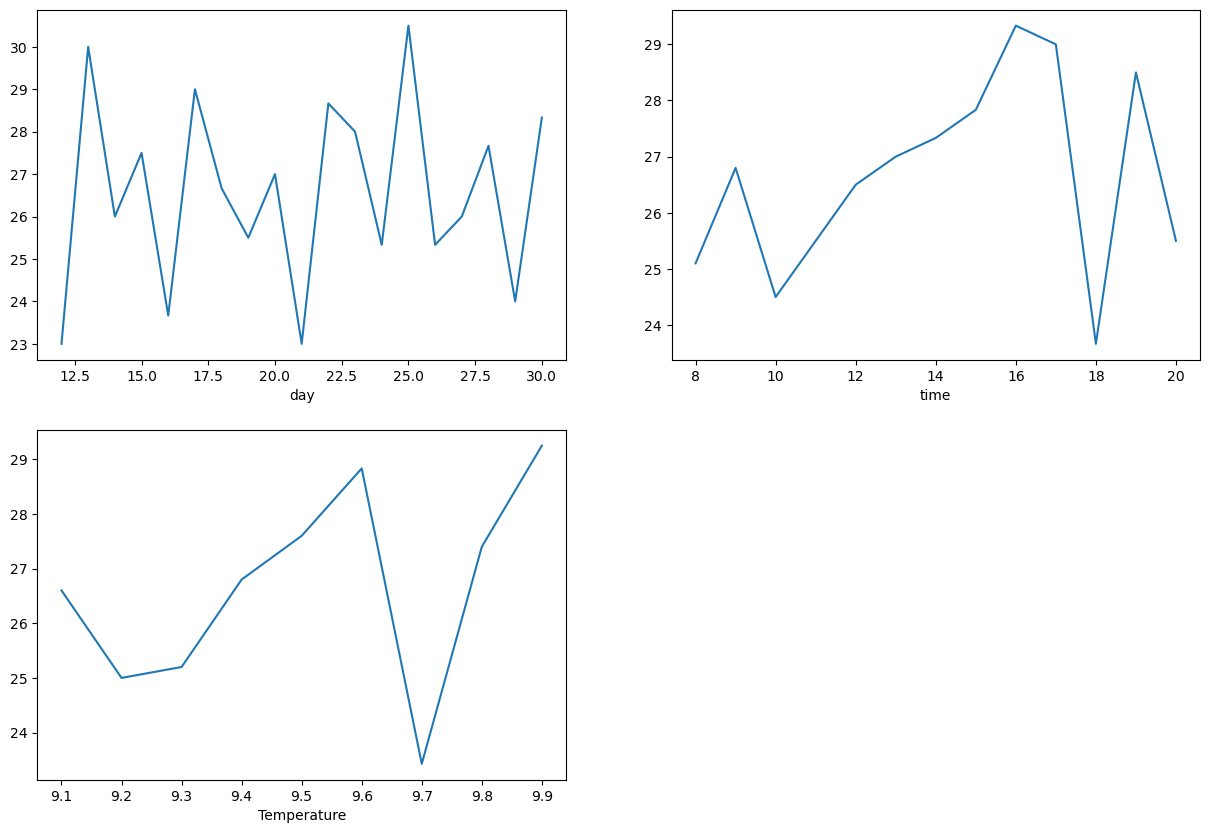

In [42]:
features = ['day', 'time', 'Temperature'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
	plt.subplot(2, 2, i + 1) 
	df.groupby(col).mean()['Count'].plot() 
plt.show() 


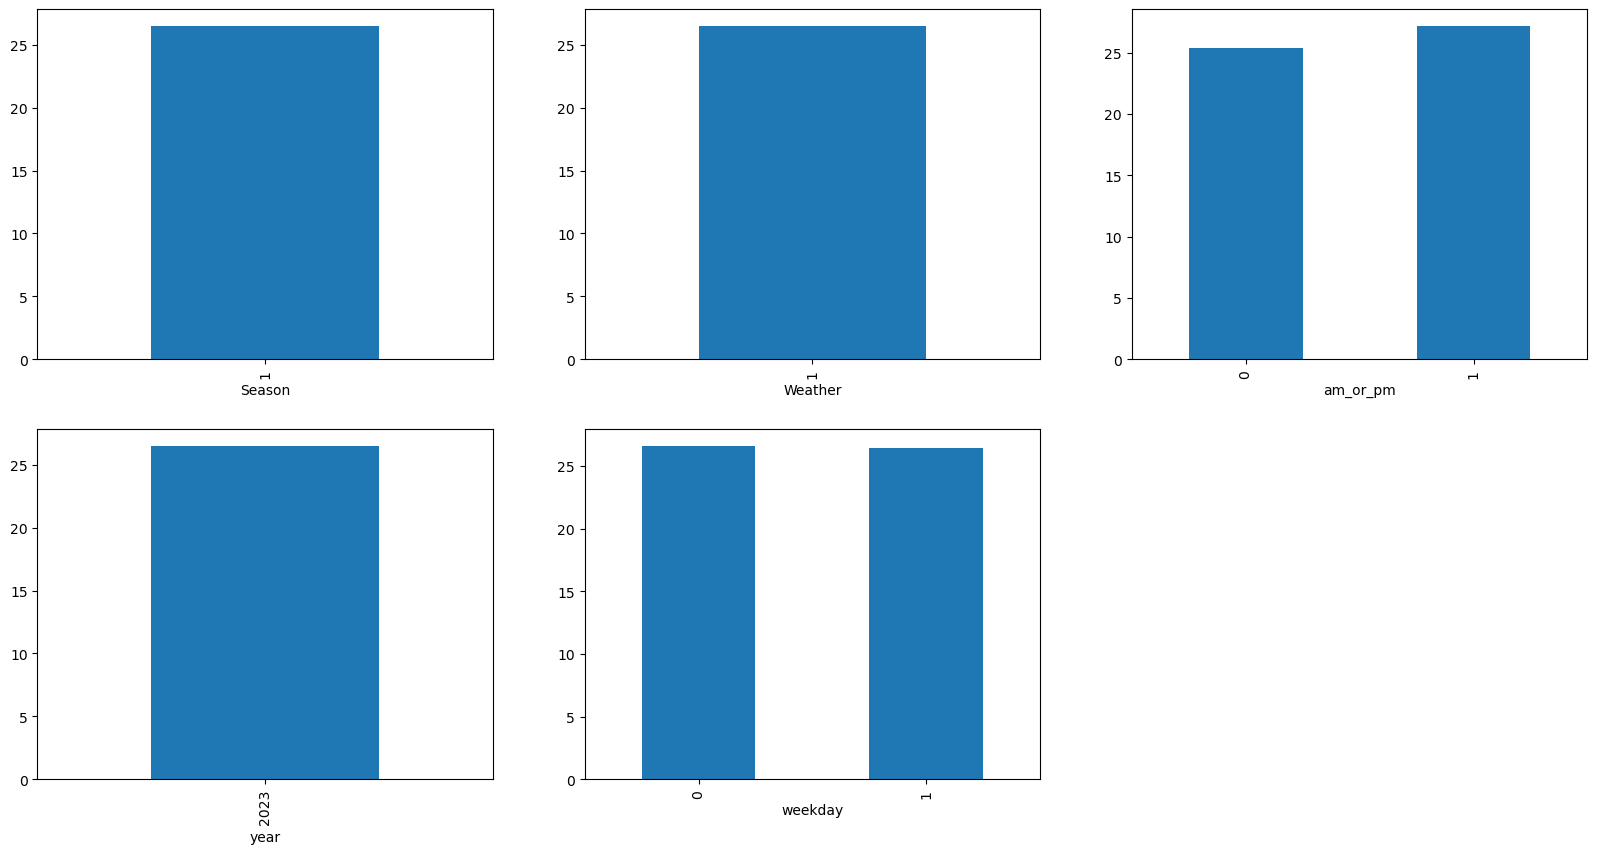

In [46]:
features = ['Season', 'Weather',
			'am_or_pm', 'year', 'weekday'] 

plt.subplots(figsize=(20, 10)) 
for i, col in enumerate(features): 
	plt.subplot(2, 3, i + 1) 
	df.groupby(col).mean()['Count'].plot.bar() 
plt.show() 


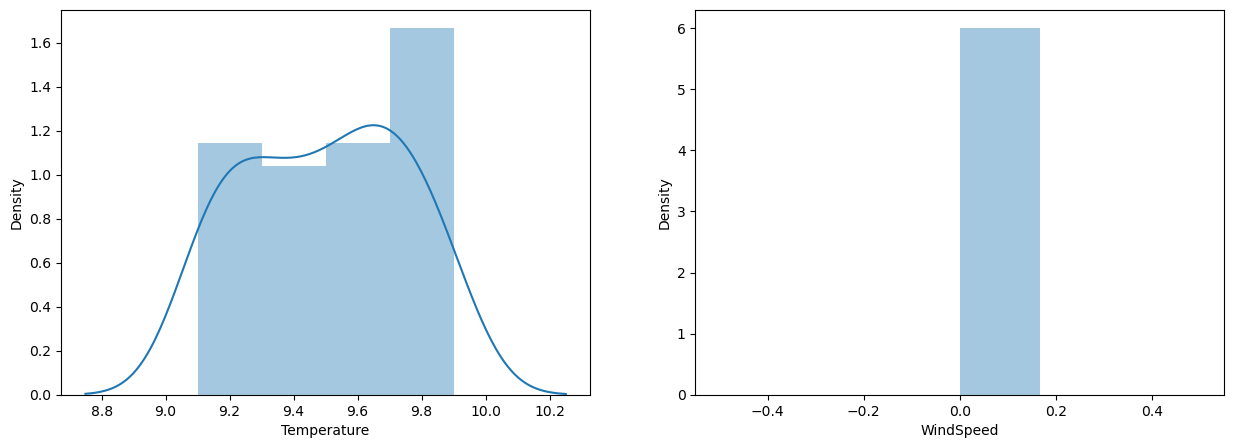

In [50]:
features = ['Temperature', 'WindSpeed'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
    plt.subplot(1, 2, i + 1) 
    sb.distplot(df[col]) 
plt.show()


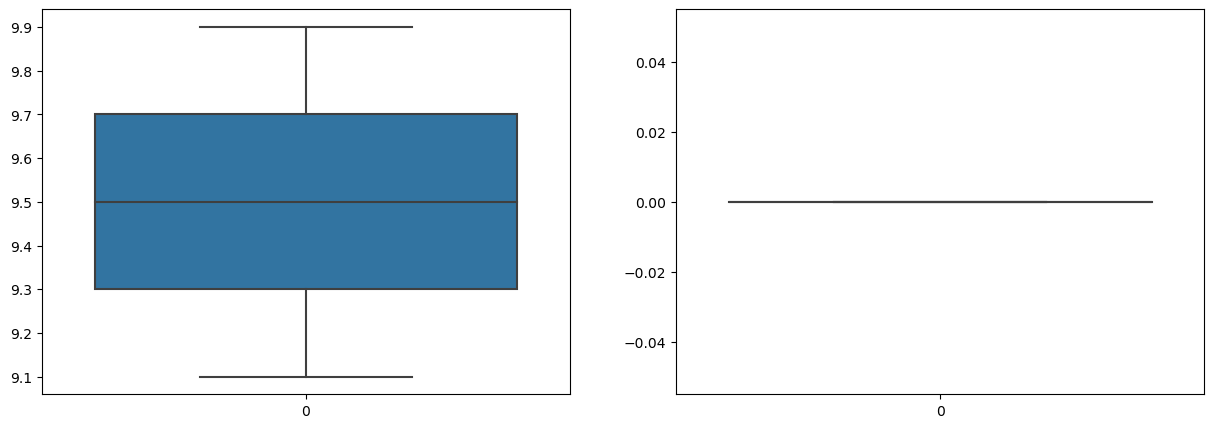

In [51]:
features = ['Temperature', 'WindSpeed'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
    plt.subplot(1, 2, i + 1) 
    sb.boxplot(df[col]) 
plt.show()


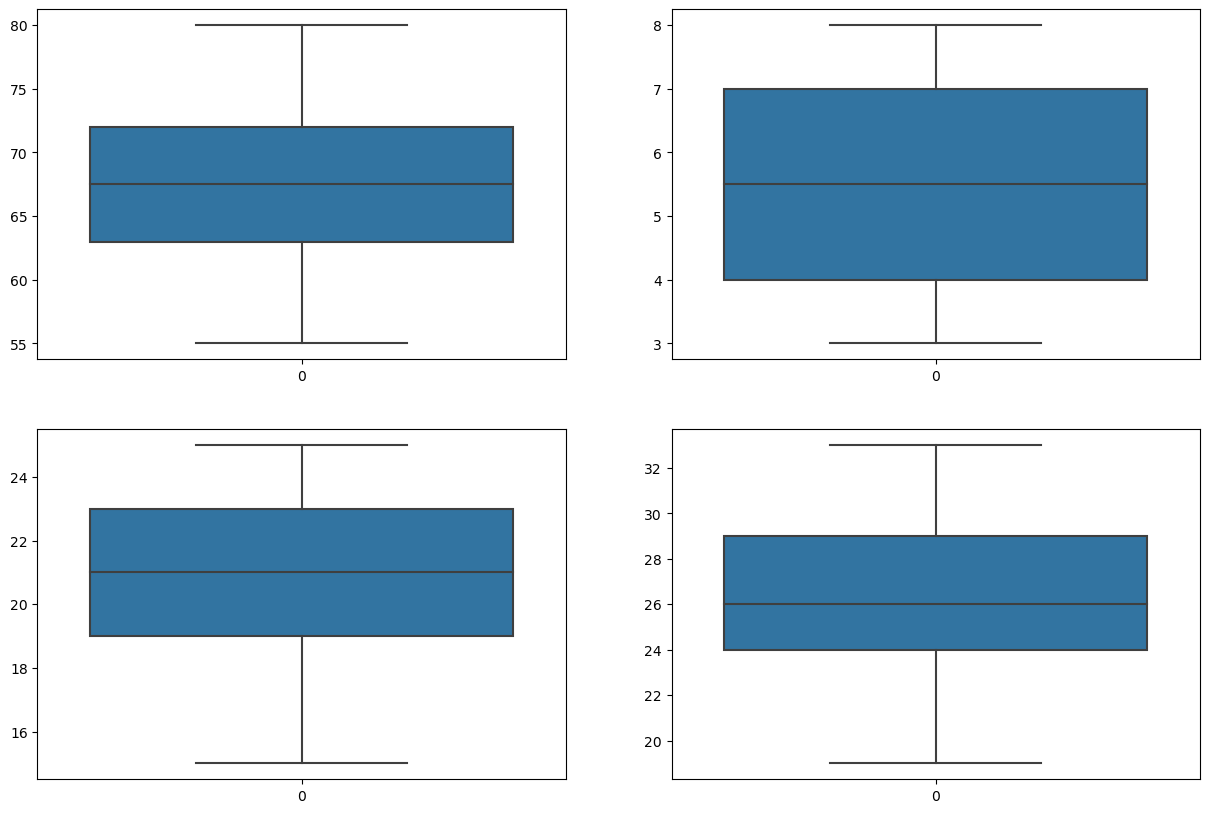

In [52]:
features = ['Humidity', 'Casual', 'Registered', 'Count'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    sb.boxplot(df[col]) 
plt.show() 


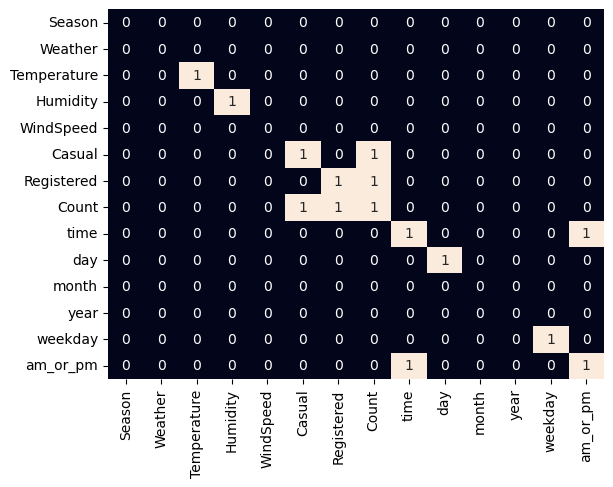

In [53]:
sb.heatmap(df.corr() > 0.8, 
		annot=True, 
		cbar=False) 
plt.show()


In [54]:
df.drop(['Registered', 'time'], axis=1, inplace=True) 
df = df[(df['WindSpeed'] < 32) & (df['Humidity'] > 0)]


In [55]:
features = df.drop(['Count'], axis=1) 
target = df['Count'].values 

X_train, X_val, Y_train, Y_val = train_test_split(features, 
												target, 
												test_size = 0.1, 
												random_state=22) 
X_train.shape, X_val.shape


((43, 11), (5, 11))

In [56]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 


In [59]:
from sklearn.metrics import mean_absolute_error as mae 
models = [LinearRegression(), Lasso(), 
		RandomForestRegressor(), Ridge()] 

for i in range(4): 
	models[i].fit(X_train, Y_train) 

	print(f'{models[i]} : ') 

	train_preds = models[i].predict(X_train) 
	print('Training Error : ', mae(Y_train, train_preds)) 

	val_preds = models[i].predict(X_val) 
	print('Validation Error : ', mae(Y_val, val_preds)) 
	print() 


LinearRegression() : 
Training Error :  1.3689350030344523
Validation Error :  2.1905443495458945

Lasso() : 
Training Error :  1.9296423899961197
Validation Error :  1.2477212476858128

RandomForestRegressor() : 
Training Error :  0.5918604651162791
Validation Error :  2.1020000000000003

Ridge() : 
Training Error :  1.372359112384454
Validation Error :  2.1137553490421936

